# Importing Libraries

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Hinge Loss

In [2]:
def svm_loss_vectorized(W,X,y,reg):
    """
    We calculate the loss and the gradient to better adjust the margins
    for the classification.
    Returns the gradient(dW) and loss
    """
    loss = 0.0
    dW = np.zeros(W.shape)
    num_train = X.shape[0]
    
    s = X.dot(W)
    #Getting the correct scores
    correct_score = s[list(range(num_train)),y]
    
    correct_score = correct_score.reshape(num_train,-1)
    
    #Now adding the margin and subtracting the scores
    # sj - syi +1
    s += 1-correct_score
    
    #Making all the correct scores to zero as we find the max value in the loss, and the correct scores
    #don't contribute to the loss function.
    s[list(range(num_train)),y] = 0
    
    loss = np.sum(np.fmax(s,0))/num_train
    
    #adding the L2 regularization term
    loss += reg * np.sum(W * W) 
    
    #Now calculating the gradient.
    X_mask = np.zeros(s.shape) #Binarize the margins.
    X_mask[ s > 0] = 1 
    X_mask[np.arange(num_train),y] = -np.sum(X_mask,axis = 1)
    dW = X.T.dot(X_mask)
    dW = dW / num_train
    #Left with only the regularization term.
    dW += 2 * reg * W 
    
    return loss,dW

# Linear Classifier

In [79]:
class LinearClassifier(object):
    
    def __init__(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=100, batch_size=200, verbose=False):
        num_train,dim = X.shape
        num_classes = np.max(y)+1
        if self.W is None:
            self.W = 0.001*np.random.randn(dim,num_classes)
        #Intialte the SGD
        loss_history = []
        for it in range(num_iters):
            x_batch = None
            y_batch = None
            
            #Considering a sample randomly
            sample_indices = np.random.choice(np.arange(num_train),batch_size)
            x_batch = X[sample_indices]
            y_batch = y[sample_indices]
            
            #Finding the loss and computing the gradient
            loss,grad = self.loss(x_batch,y_batch,reg)
            loss_history.append(loss)
            
            #Updating the weights based on the gradient
            self.W += -learning_rate * grad
            
            #Printing the loss over verbose, to have a track
            if verbose and it%100 == 0:
                print(f'iteration {it} / {num_iters}: loss {loss}')

    def loss(self,X_batch,y_batch,reg):
        pass
    
    def predict(self,X):
        """
        Using the trained weights of the classifier to predict the labels.
        Inputs:
        X - A numpy array of the shape (N,D) containing N training exampels and
        samples of dimension D
        
        Return:
        y_pred - Predicted labels of X, where y_pred is a 1-Dim array of length N.
        
        
        """
        y_pred = np.zeros(X.shape[0])
        
        scores = X.dot(self.W)
        
        #finding which class has the max score.
        y_pred = np.argmax(scores,axis=1) 
        return y_pred

# SVM Classifier

In [80]:
class LinearSVM(LinearClassifier):
    """ Here we are inheriting the above class LinearClassifier to
        calculate the hinge loss."""
    
    #Calculating the SVM loss.
    def loss(self,X_batch,y_batch,reg):    
        return svm_loss_vectorized(self.W,X_batch,y_batch,reg)

# Sampling

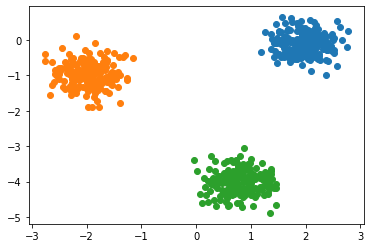

In [75]:
# Parameters
N_1 = 200
MU_1 = [2.0, -0.1]
SIGMA_1 = np.eye(2) * 0.1
N_2 = 200
MU_2 = [-2.0, -1.0]
SIGMA_2 = np.eye(2) * 0.1
N_3 = 200
MU_3 = [0.75, -4.0]
SIGMA_3 = np.eye(2) * 0.1

# Sample
X_1 = np.random.multivariate_normal(MU_1, SIGMA_1, N_1)
X_2 = np.random.multivariate_normal(MU_2, SIGMA_2, N_2)
X_3 = np.random.multivariate_normal(MU_3, SIGMA_3, N_3)

# Unify
X = np.vstack( (X_1, X_2, X_3) )
Y = np.array([1]*N_1 + [2]*N_2 + [3]*N_3)
assert(len(X) == len(Y))

# Append bias
X = np.hstack( (X, np.ones((X.shape[0], 1))) )    
assert(X.shape[1] == 3)

# Plot
plt.scatter(X_1[:,0], X_1[:,1], c='tab:blue')
plt.scatter(X_2[:,0], X_2[:,1], c='tab:orange')
plt.scatter(X_3[:,0], X_3[:,1], c='tab:green')
plt.show()

# Training

iteration 0 / 1500: loss 3.417541759335924
iteration 100 / 1500: loss 3.055757733919463
iteration 200 / 1500: loss 3.0073631450913
iteration 300 / 1500: loss 3.0008045151463403
iteration 400 / 1500: loss 2.9999659010434927
iteration 500 / 1500: loss 2.999835350160001
iteration 600 / 1500: loss 2.9998121367454904
iteration 700 / 1500: loss 2.9998428411294853
iteration 800 / 1500: loss 2.9998212629407677
iteration 900 / 1500: loss 2.9998399142011185
iteration 1000 / 1500: loss 2.999845075429614
iteration 1100 / 1500: loss 2.9998262889853886
iteration 1200 / 1500: loss 2.9998197220317246
iteration 1300 / 1500: loss 2.9997962258085864
iteration 1400 / 1500: loss 2.999841682509038


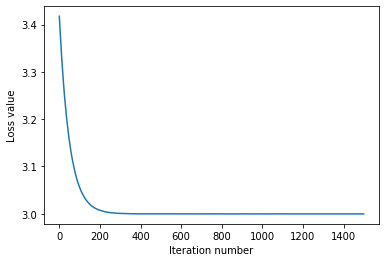

In [76]:
svm = LinearSVM(X, Y, learning_rate=1e-7, reg=5e4,
                      num_iters=1500, verbose=True)
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

# Prediction

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True False  True False  True  T

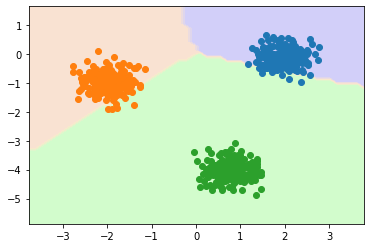

In [77]:
nx = 50
ny = 50

xx, yy = np.meshgrid(np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, nx),
                     np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, ny))

X_pred = np.hstack((xx.reshape((-1, 1)), yy.reshape((-1, 1)), np.ones((nx*ny, 1))))
Y_pred = svm.predict(X_pred)  # Returns 1-2-3.... Hmmmm....
#print(Y_pred.shape)
print(Y == svm.predict(X))

cm = LinearSegmentedColormap.from_list('multi-classify', [(0.8,0.8,1), (1,0.9,0.8), (0.8, 1, 0.8)])

plt.contourf(xx, yy, Y_pred.reshape((ny, nx)), cmap=cm)
plt.scatter(X_1[:,0], X_1[:,1], c='tab:blue')
plt.scatter(X_2[:,0], X_2[:,1], c='tab:orange')
plt.scatter(X_3[:,0], X_3[:,1], c='tab:green')
plt.show()